In [2]:
import pylidc as pl
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import csv
# set working directory
workdir = "/home/qw817/Desktop/Lung_TDA_application"
import os
import sys
os.chdir(workdir)
sys.path.insert(0, os.path.join(workdir, "Functions"))
# Handling arrays
import numpy as np

# Handling dicom images
import SimpleITK as sitk

# Persistent homology and topological feature extraction
import TDAfeatures as tf
from ripser import ripser
from persim import plot_diagrams

In [4]:
ann = pl.query(pl.Annotation).join(pl.Scan)\
.filter(pl.Scan.patient_id == 'LIDC-IDRI-0068').first()
vol = tf.read_dcm("dcm/0068")

In [6]:
vol

<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x7f9d266a4540> >

In [7]:
scan = pl.query(pl.Scan).filter(pl.Scan.patient_id == 'LIDC-IDRI-0068').first()


In [8]:
nods = scan.cluster_annotations()

Loading dicom files ... This may take a moment.


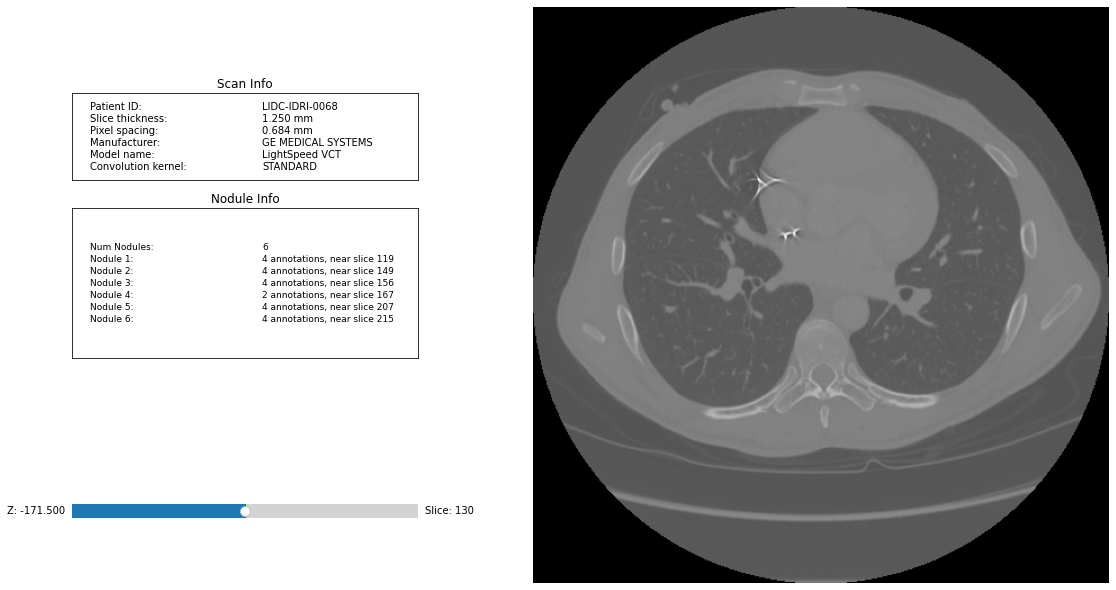

In [9]:
scan.visualize(annotation_groups=nods)

In [10]:
mask = np.genfromtxt("masks/LIDC-IDRI-0068_mask.csv", delimiter = ',')

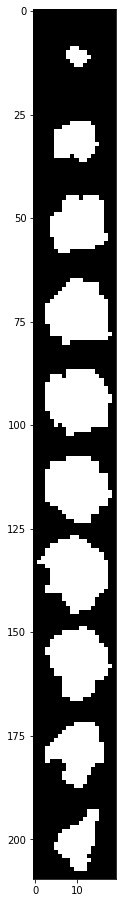

In [16]:
fig=plt.figure(figsize=(4, 16))
plt.imshow(mask, cmap=plt.cm.gray)

In [26]:
mask.shape

(210, 20)

In [29]:
np.concatenate([mask[:70,:], mask[70:140,:],mask[140:,:]],axis=1).shape

(70, 60)

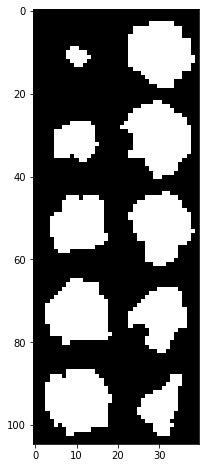

In [33]:
fig=plt.figure(figsize=(8, 8))
plt.imshow(np.concatenate([mask[:105,:], mask[105:,:]],axis=1), cmap=plt.cm.gray)

In [17]:
pt = np.genfromtxt("small_point_clouds/pc_0068.txt", delimiter = ',')

In [18]:
pt.shape

(989, 3)

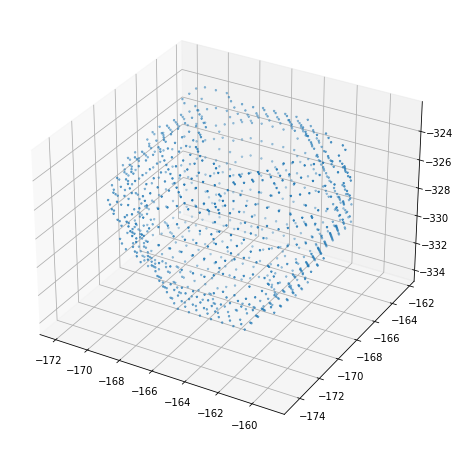

In [25]:
x = pt[:, 0]
y = pt[:, 1]
z = pt[:, 2]

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, s=6, marker ='1')
ann.visualize_in_3d()plt.show()

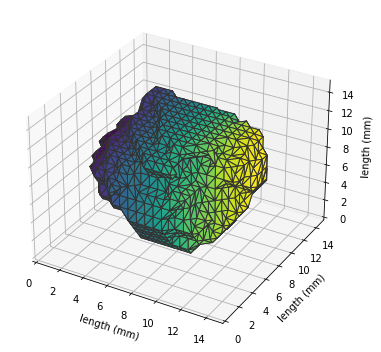

In [34]:
ann.visualize_in_3d()